## 1. 导入依赖包

In [1]:
import torch
from torch import nn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
os.environ['KMP_DUPLICATE_LIB_OK'] = 'TRUE'

## 2. 导入数据并查看数据

In [2]:
data = pd.read_csv('../../data/Income.csv')

查看数据整体情况

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  30 non-null     int64  
 1   Education   30 non-null     float64
 2   Income      30 non-null     float64
dtypes: float64(2), int64(1)
memory usage: 848.0 bytes


查看数据的前5行

In [4]:
data.head()

,Unnamed: 0,Education,Income
0,1,10.000000,26.658839
1,2,10.401338,27.306435
2,3,10.842809,22.132410
3,4,11.244147,21.169841
4,5,11.645485,15.192634


绘制数据的散点图，受教育年限为x轴，收入为y轴

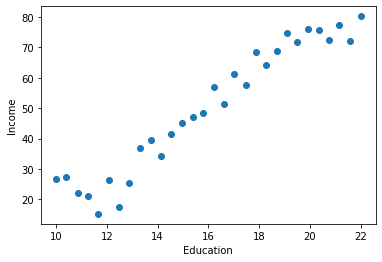

In [5]:
plt.scatter(data.Education, data.Income)
plt.xlabel('Education')
plt.ylabel('Income')
plt.show()

将受教育年限和收入转化为tensor

In [6]:
X = torch.from_numpy(data.Education.values.reshape(-1, 1).astype(np.float32))
Y = torch.from_numpy(data.Income.values.reshape(-1, 1).astype(np.float32))

定义一个 y = wx + b模型

In [7]:
model = nn.Linear(1, 1)

定义损失函数

In [8]:
loss_fn = nn.MSELoss()

定义优化器

In [9]:
opt = torch.optim.SGD(model.parameters(), lr=0.0001)

将模型训练10000个epoch，每一轮输入x对其进行预测，然后计算其与真实值之间的损失，将变量的梯度清零再求解变量的提高，最后更新模型参数

In [10]:
for epoch in range(10000):
    for x, y in zip(X, Y):
        y_pred = model(x)
        loss = loss_fn(y, y_pred)
        opt.zero_grad()
        loss.backward()
        opt.step()

查看模型权重

In [11]:
model.weight

Parameter containing:
tensor([[5.3544]], requires_grad=True)

查看模型偏置

In [12]:
model.bias

Parameter containing:
tensor([-35.3825], requires_grad=True)

绘制原始数据和预测数据

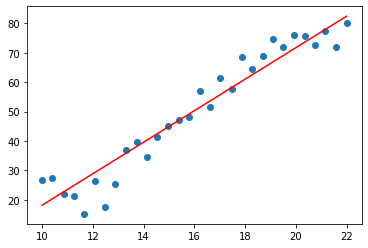

In [13]:
plt.scatter(data.Education, data.Income)
plt.plot(X.numpy(), model(X).data.numpy(), c='r')